# Rubikloud Presents: The 2018 Analytics By Design Case Competition

contestant: Hong(Phoebe) Zhu

### ------------------------------------- The code down below are provided officially  ---------------------------------------
### ------------------------------------Considering copyright, no full data will be shown-------------------------------------

In [ ]:
installed.packages()[, c(1, 3)]

In [4]:
# If you want to install a package that is not pre-installed, simply run the following line of code
# In this example, we're installing the forcats package (http://forcats.tidyverse.org/)

# For that we need to create first a folder where we can have our user installed packages: 
dir.create('UserLibrary')

# And add our folder to the list of paths containing libraries.

.libPaths( c( .libPaths(), 'UserLibrary') )

# Now here we go!


install.packages('forcats', lib='UserLibrary')
# Note: if you restart your server, you will need to re-install your packages

Warning message in dir.create("UserLibrary"):
“'UserLibrary' already exists”

In [352]:
# Look, now `forcats` is installed! 
tail(installed.packages(), n=1)

,Package,LibPath,Version,Priority,Depends,Imports,LinkingTo,Suggests,Enhances,License,License_is_FOSS,License_restricts_use,OS_type,MD5sum,NeedsCompilation,Built
plyr,plyr,/home/rubione/work/private/UserLibrary,1.8.4,NA,R (>= 3.1.0),Rcpp (>= 0.11.0),Rcpp,"abind, testthat, tcltk, foreach, doParallel, itertools, iterators, covr",NA,MIT + file LICENSE,NA,NA,NA,NA,yes,3.3.3


In [4]:
library(dplyr)
library(lubridate)
library(tidyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



## Dataset

The dataset you will work with is a typical dataset that a retailer would have access to. There are three primary tables:

- **`customers`: anonymized list of all customers**
  - `customer_id`: `bigint` - anonymized id of customer
  - `registration_date`: `datetime` - date of registration with the loyalty program (may be on a date earlier than the transaction table goes)
- **`products`: list of all products with corresponding attributes**
  - `product_id`: bigint - anonymized id of product
  - `price`: `float` - regular price of product
  - `brand_id`: `varchar` - anonymized brand of product
  - `division`: `varchar` - high-level categorization of product
  - `category`: `varchar` - 2nd-level categorization of product
  - `subcategory`: `varchar` - 3nd-level categorization of product
  - `fineline`: `varchar` - 4nd-level categorization of product (usually corresponds to color or flavours of a product)
- **`transactions`: customer purchase data, each row represents a single product purchased within an order from a customer**
  - `customer_id`: `bigint` - foreign key into customers table
  - `product_id`: `bigint` - foreign key into products table
  - `sale_id`: `bigint` - order number; multiple products can be purchased in a single order
  - `transaction_date`: `datetime` - week transaction occurred
  - `product_quantity`: `int` - number of product purchased
  - `product_price`: `int` - sales from this product in this transaction (i.e. `product_quantity * avg_price_per_product`), includes discounts if any
  
**NOTE: This dataset is confidential and private and is not to leave Rubikloud's servers.**

## Accessing the data

In order to access the data, all you need to do is reference the *relative path* of the data. **The datasets provided can not and should not be downloaded in any way**.

For example, to read in the customers CSV files, simply use 
customers <- read.csv('/home/rubione/work/public/data/customers.csv')

See below for a few examples.

Let's see how our data looks.

In [357]:
customers <- read.csv('/home/rubione/work/public/data/customers.csv')
print(dim(customers))
head(customers)

[1] 1000000       2


customer_id,registration_date
25540437,2007-09-28 00:00:00
13979277,2007-10-07 00:00:00
25381493,2007-10-07 00:00:00
41970813,2007-10-07 00:00:00
24930117,2007-10-07 00:00:00
39871125,2007-10-07 00:00:00


In [358]:
products <- read.csv('/home/rubione/work/public/data/products.csv')
print(dim(products))
head(products)

[1] 52843     7


product_id,price,brand_id,division,category,subcategory,fineline
42879,10,359,15,11,46,6f1ba46da1abfd8fa10ad4055427ebe1
24926,9,70,15,11,46,dcda54e29207294d8e7e1b537338b1c0
34251,13,213,15,11,46,d799ddd9de9cc9964d5e0d936d6f284d
1410,6,80,15,11,46,943bbfd3b1b538841834b5fe8f3f18ff
12491,28,32,15,11,46,b4b5b5ca5d5fc4e8fe2f24c655cec987
49548,19,349,15,11,46,f6a7bf0dd91a7349da4c2fb95cb61b1f


In [7]:
length(unique(products$brand_id))
length(unique(products$division))
length(unique(products$category))
length(unique(products$subcategory))
length(unique(products$fineline))

[1] 764

[1] 26

[1] 26

[1] 108

[1] 27760

In [359]:
# Note that the transactions table is extremely large! Loading it will take some time.
library(magrittr)
transactions <- read.csv('/home/rubione/work/public/data/transactions.csv') %>% 
    mutate(transaction_date=parse_date_time(transaction_date, orders='ymd HMS'))
print(dim(transactions))
head(transactions)

[1] 18242155        6


customer_id,product_id,sale_id,transaction_date,product_quantity,product_price
19598045,29894,b376bf141dbadfee5c9f53b33cbe39ac,2009-12-21,1,4
39801397,30483,d0a12cc99c7fec2380e8781416a1403c,2009-12-14,1,7
49744497,30678,bf6bc6d2d575a4f17c0e82efe29a7585,2009-10-12,1,6
24637068,23630,27aa9ff7c603fdd379dc41c33fd8af3c,2009-03-09,1,5
24911294,14004,867718a9254e735f6416975df4131462,2010-05-30,1,17
42953928,23069,32df6aadce7ac5b2bb052a9bb5fe2c3f,2010-06-06,1,9


In [9]:
transactions$sale_id<-NULL
transactions$month <- as.numeric(format(as.Date(transactions$transaction_date), "%m"))
transactions$year <- as.numeric(format(as.Date(transactions$transaction_date), "%Y"))
head(transactions)

customer_id,product_id,transaction_date,product_quantity,product_price,month,year
19598045,29894,2009-12-21,1,4,12,2009
39801397,30483,2009-12-14,1,7,12,2009
49744497,30678,2009-10-12,1,6,10,2009
24637068,23630,2009-03-09,1,5,3,2009
24911294,14004,2010-05-30,1,17,5,2010
42953928,23069,2010-06-06,1,9,6,2010


In [10]:
transactions$revenue <- transactions$product_quantity * transactions$product_price
head(transactions)

customer_id,product_id,transaction_date,product_quantity,product_price,month,year,revenue
19598045,29894,2009-12-21,1,4,12,2009,4
39801397,30483,2009-12-14,1,7,12,2009,7
49744497,30678,2009-10-12,1,6,10,2009,6
24637068,23630,2009-03-09,1,5,3,2009,5
24911294,14004,2010-05-30,1,17,5,2010,17
42953928,23069,2010-06-06,1,9,6,2010,9


## Split train/test for transactions

Let's start splitting our training and test data in order to run an RFM model.



In [11]:
print(paste("Start at", min(transactions$transaction_date), "until", max(transactions$transaction_date)))

[1] "Start at 2009-01-05 until 2010-12-26"


In [12]:
train_txns <- transactions %>% filter(transaction_date >= '2009-01-01' & transaction_date < '2010-01-01')

In [13]:
print('Train: ')
print(paste(' * rows:', dim(train_txns)[1]))
print(paste(' * min date:', min(train_txns$transaction_date)))
print(paste(' * max date:', max(train_txns$transaction_date)))


[1] "Train: "
[1] " * rows: 6978669"
[1] " * min date: 2009-01-05"
[1] " * max date: 2009-12-28"


In [14]:
length(unique(customers$customer_id))
length(unique(train_txns$customer_id))

[1] 1000000

[1] 544583

## Feature Extraction

In [15]:
extract_rfm <- function(transactions, customers){
transactions %>% 
mutate(dtdiff=as.numeric(difftime(max(transaction_date), transaction_date, units='days'))) %>%
group_by(customer_id) %>% 
summarise(
    recency=360 - max(dtdiff),
    frequency=n(),
    monetary=sum(product_price),
) %>%
mutate(
    recency=ntile(recency, 10), 
    frequency=ntile(frequency, 10),
    monetary=ntile(monetary, 10)
) %>%
right_join(customers, by='customer_id') %>%
select(customer_id, recency, frequency, monetary) %>%
mutate_if(is.numeric , replace_na, replace = 0)}

In [16]:
features = extract_rfm(train_txns, customers)
head(features)

customer_id,recency,frequency,monetary
25540437,6,9,10
13979277,6,8,7
25381493,1,10,10
41970813,3,8,10
24930117,1,10,10
39871125,9,2,1


### -------------------------------------------- The code down below are written by me ---------------------------------------

# Part 1 :  Customer Segmentation (2 ways)

### ---------------- Segmentation based on RFM, using K-Means ------------------

#### Try: Divide the 100 sample individuals into 3 benefit segments

In [17]:
library(dplyr)
df1 <-  features[,c(2:4)]

#Divide the 100 sample individuals into 3 benefit segments.
result1 = kmeans(df1, 3, iter.max = 10, nstart = 1, algorithm = c("Hartigan-Wong", "Lloyd", "Forgy","MacQueen"), trace=FALSE) 
category_3 = result1$cluster
temp = cbind(df1[,c(1:3)], cluster =category_3)
mean_category3 = aggregate(.~cluster, temp ,mean ) 
median_category3 = aggregate(.~cluster, temp ,median )
num_in_clusters3 = table(result1$cluster)

num_in_clusters3
mean_category3
median_category3


     1      2      3 
255812 268059 476129 

cluster,recency,frequency,monetary
1,7.67506216,3.2853893,3.34134442
2,3.68182751,7.8603703,7.81685375
3,0.09426437,0.1002186,0.09465502


cluster,recency,frequency,monetary
1,8,3,3
2,3,8,8
3,0,0,0


#### Try: Divide the 100 sample individuals into 4 benefit segments

In [31]:
#Divide the 100 sample individuals into 4 benefit segments.
result1 = kmeans(df1, 4, iter.max = 10, nstart = 1, algorithm = c("Hartigan-Wong", "Lloyd", "Forgy","MacQueen"), trace=FALSE) 
category_4 = result1$cluster
temp = cbind(df1[,c(1:3)], cluster =category_4)
mean_category4 = aggregate(.~cluster, temp ,mean ) 
median_category4 = aggregate(.~cluster, temp ,median )
num_in_clusters4 = table(result1$cluster)

num_in_clusters4
mean_category4
median_category4


     1      2      3      4 
182971 165545 178176 473308 

cluster,recency,frequency,monetary
1,3.02277410,8.57871466,8.52678293
2,8.22971398,2.40790117,2.47745930
3,5.83141950,5.55691563,5.55728605
4,0.08602221,0.07779501,0.07340252


cluster,recency,frequency,monetary
1,3,9,9
2,9,2,2
3,6,6,6
4,0,0,0


#### Try: Divide the 100 sample individuals into 5 benefit segments

In [32]:
#Divide the 100 sample individuals into 5 benefit segments.
result1 = kmeans(df1, 5, iter.max = 10, nstart = 1, algorithm = c("Hartigan-Wong", "Lloyd", "Forgy","MacQueen"), trace=FALSE) 
category_5 <- result1$cluster
temp = cbind(df1[,c(1:3)], cluster =category_5)
mean_category5 = aggregate(.~cluster, temp ,mean ) 
median_category5 = aggregate(.~cluster, temp ,median )
num_in_clusters5 = table(result1$cluster)

num_in_clusters5
mean_category5
median_category5


     1      2      3      4      5 
150687 106021 168211 109016 466065 

cluster,recency,frequency,monetary
1,2.79178695,8.83626988,8.78799100
2,7.33938559,6.63326134,6.79587063
3,8.27856680,2.49462282,2.55246090
4,3.46682138,4.80967931,4.63948411
5,0.05557594,0.03534056,0.03289455


cluster,recency,frequency,monetary
1,3,9,9
2,7,7,7
3,8,2,2
4,4,5,5
5,0,0,0


#### Try: Divide the 100 sample individuals into 6 benefit segments

In [34]:
#Divide the 100 sample individuals into 6 benefit segments.
result1 = kmeans(df1, 6, iter.max = 10, nstart = 1, algorithm = c("Hartigan-Wong", "Lloyd", "Forgy","MacQueen"), trace=FALSE) 
category_6 <- result1$cluster
temp = cbind(df1[,c(1:3)], cluster =category_6)
mean_category6 = aggregate(.~cluster, temp ,mean ) #0,0,0 bought for the first time and never come back??
median_category6 = aggregate(.~cluster, temp ,median )
num_in_clusters6 = table(result1$cluster)

num_in_clusters6
mean_category6
median_category6


     1      2      3      4      5      6 
 99080 140886  91253 464609  80426 123746 

cluster,recency,frequency,monetary
1,3.21188938,4.83325595,4.66254542
2,8.19454736,2.14329316,2.18194853
3,7.92098890,5.06084184,5.21692438
4,0.04321483,0.03054612,0.02850139
5,6.12748365,7.88583294,7.97893716
6,2.31740824,8.92253487,8.84727587


cluster,recency,frequency,monetary
1,3,5,5
2,8,2,2
3,8,5,5
4,0,0,0
5,6,8,8
6,2,9,9


In [35]:
head(features)

customer_id,recency,frequency,monetary
25540437,6,9,10
13979277,6,8,7
25381493,1,10,10
41970813,3,8,10
24930117,1,10,10
39871125,9,2,1


### After deviding to 3,4,5,6 segments according to RFM, we decided to have 4 segmentation, which will capture most features of each segment

#### cluster1: customers with nearly no value
#### cluster2: customers with high value: low recency, high frequency and monetary value
#### cluster3: customers with low value: high recency, low frequency and monetary value
#### cluster4: customers with medium value: medium recency,  frequency and monetary value

In [18]:
# after deviding to 3,4,5,6 segments according to RFM, we decided to have 4 segmentation, which will capture most features of each segment
df1 <-  features[,c(2:4)]
result1 = kmeans(df1, 4, iter.max = 10, nstart = 1, algorithm = c("Hartigan-Wong", "Lloyd", "Forgy","MacQueen"), trace=FALSE) 
category_4 = result1$cluster
temp = cbind(features, cluster =category_4)
mean_category4 = aggregate(.~cluster, temp ,mean ) 
median_category4 = aggregate(.~cluster, temp ,median )
num_in_clusters4 = table(result1$cluster)

num_in_clusters4
mean_category4
median_category4


     1      2      3      4 
471852 161684 176119 190345 

cluster,customer_id,recency,frequency,monetary
1,25684468,0.0739448,0.07320516,0.06920178
2,34784044,2.8592563,8.76488088,8.71462235
3,26740107,8.1178521,2.48467230,2.54447845
4,30324307,5.6124773,5.81008695,5.80736557


cluster,customer_id,recency,frequency,monetary
1,26947078,0,0,0
2,39863496,3,9,9
3,24780660,8,2,2
4,32365392,6,6,6


In [19]:
custmoer_4cluster <- temp
head(custmoer_4cluster)
#customer_id with 4 segementation: cluster1, 2, 3, 4
#          recency  frequency  monetary
#cluster1:    0         0         0     (471852)
#cluster2:    3         9         9     (161684)
#cluster3:    8         2         2     (176119)
#cluster4:    6         6         6     (190345)

customer_id,recency,frequency,monetary,cluster
25540437,6,9,10,2
13979277,6,8,7,4
25381493,1,10,10,2
41970813,3,8,10,2
24930117,1,10,10,2
39871125,9,2,1,3


In [20]:
write.csv(custmoer_4cluster, "customerSeg.csv")

### ---------------- Segmentation based on RFM, using CLV Scale ------------------

In [355]:
library(dplyr)
library(lubridate)
library(tidyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘lubridate’

The following object is masked from ‘package:plyr’:

    here

The following object is masked from ‘package:base’:

    date


Attaching package: ‘tidyr’

The following object is masked from ‘package:Matrix’:

    expand



In [ ]:
# Train/History period will be [2009-01, 2009-12], to cover all possible combination of R, F, M
# Test/predict period will be [2010-01, 20010-2], as period 1, see how many purchased again, as 1st period's retention,
# Predict period 2 will be [2010-03, 20010-4], as period 2, see how many purchased again, as 2ed period's retention,
#same for period 3, 4, 5, 6 

train_txns <- transactions %>% filter(transaction_date >= '2009-01-01' & transaction_date < '2010-01-01')
features_predict1 <- transactions %>% filter(transaction_date >= '20010-01-01' & transaction_date < '2010-03-01')
features_predict2 <- transactions %>% filter(transaction_date >= '20010-03-01' & transaction_date < '2010-05-01')
features_predict3 <- transactions %>% filter(transaction_date >= '20010-05-01' & transaction_date < '2010-07-01')
features_predict4 <- transactions %>% filter(transaction_date >= '20010-07-01' & transaction_date < '2010-09-01')
features_predict5 <- transactions %>% filter(transaction_date >= '20010-09-01' & transaction_date < '2010-11-01')
features_predict6 <- transactions %>% filter(transaction_date >= '20010-11-01' & transaction_date < '2010-12-31')

In [ ]:
install.packages('plyr', lib='UserLibrary')
require(plyr)

In [ ]:
Buy <- rep(0, nrow(features))
features <- cbind(features, Buy)

In [ ]:
features_predict1 <- cbind(features_predict1, Buy)
features_old <- features[which(!(features$recency == 0 & features$frequency == 0 & features$monetary == 0)),]
features_new <- features[which(features$recency == 0 & features$frequency == 0 & features$monetary == 0),]

In [ ]:
features_predict1_old <- features_predict1[which(!(features_predict1$recency == 0 & features_predict1$frequency == 0 & features_predict1$monetary == 0)),]
features_predict1_new <- features_predict1[which(features_predict1$recency == 0 & features_predict1$frequency == 0 & features_predict1$monetary == 0),]

#### if the customer repurchased in the next period, assigh 1 to 'Buy'

In [ ]:
eatures_old[features_old$customer_id %in% features_predict1_old$customer_id, ]$Buy <- 1

#### Calculate the Number customer who repurchased

In [ ]:
Var <- c("recency","frequency","monetary","Buy")
b <- features_old[ ,names(features) %in% Var, drop = F]
a <- ddply(b, Var, summarize, Number = length(Buy))

#### Calculate the customers' retention rate

In [ ]:
numerator <- ave(a$Number,a[,names(a) %in% Var,drop=F],FUN=sum)
Var2 <- c("recency","frequency","monetary")
denominator <- ave(a$Number,a[,names(a) %in% Var2,drop=F],FUN=sum)
retention1 <- numerator/denominator#Retention rate in period 1
a <- cbind(a, retention1)
a_buy <- a[a$Buy == 1,]
a_notbuy <- a[a$Buy != 1,]

In [ ]:
features_predict2_old <- features_predict2[which(!(features_predict2$recency == 0 & features_predict2$frequency == 0 & features_predict2$monetary == 0)),]
features_predict3_old <- features_predict3[which(!(features_predict3$recency == 0 & features_predict3$frequency == 0 & features_predict3$monetary == 0)),]
features_predict4_old <- features_predict4[which(!(features_predict4$recency == 0 & features_predict4$frequency == 0 & features_predict4$monetary == 0)),]
features_predict5_old <- features_predict5[which(!(features_predict5$recency == 0 & features_predict5$frequency == 0 & features_predict5$monetary == 0)),]
features_predict6_old <- features_predict6[which(!(features_predict6$recency == 0 & features_predict6$frequency == 0 & features_predict6$monetary == 0)),]

In [ ]:
features_old$Buy <- 0
features_old[features_old$customer_id %in% features_predict2_old$customer_id, ]$Buy <- 1
Var <- c("recency","frequency","monetary","Buy")
b <- features_old[ ,names(features) %in% Var, drop = F]
a2 <- ddply(b, Var, summarize, Number = length(Buy))

numerator <- ave(a2$Number,a2[,names(a2) %in% Var,drop=F],FUN=sum)

Var2 <- c("recency","frequency","monetary")
denominator <- ave(a2$Number,a2[,names(a2) %in% Var2,drop=F],FUN=sum)

retention2 <- numerator/denominator#Retention rate in period 1
a2 <- cbind(a2, retention2)

a_buy2 <- a2[a2$Buy == 1,]

In [ ]:
temp <- merge(a_buy[ , c("recency","frequency","monetary","retention1")], a_buy2[ , c("recency","frequency","monetary","retention2")], by = c("recency","frequency","monetary"), all.x=TRUE)
temp

In [ ]:
features_old$Buy <- 0
features_old[features_old$customer_id %in% features_predict3_old$customer_id, ]$Buy <- 1
Var <- c("recency","frequency","monetary","Buy")
b <- features_old[ ,names(features) %in% Var, drop = F]
a2 <- ddply(b, Var, summarize, Number = length(Buy))
numerator <- ave(a2$Number,a2[,names(a2) %in% Var,drop=F],FUN=sum)
Var2 <- c("recency","frequency","monetary")
denominator <- ave(a2$Number,a2[,names(a2) %in% Var2,drop=F],FUN=sum)
retention3 <- numerator/denominator#Retention rate in period 1
a2 <- cbind(a2, retention3)
a_buy3 <- a2[a2$Buy == 1,]

temp <- merge(temp, a_buy3[ , c("recency","frequency","monetary","retention3")], by = c("recency","frequency","monetary"), all.x=TRUE)
temp

In [ ]:
features_old$Buy <- 0
features_old[features_old$customer_id %in% features_predict4_old$customer_id, ]$Buy <- 1
Var <- c("recency","frequency","monetary","Buy")
b <- features_old[ ,names(features) %in% Var, drop = F]
a2 <- ddply(b, Var, summarize, Number = length(Buy))
numerator <- ave(a2$Number,a2[,names(a2) %in% Var,drop=F],FUN=sum)
Var2 <- c("recency","frequency","monetary")
denominator <- ave(a2$Number,a2[,names(a2) %in% Var2,drop=F],FUN=sum)
retention4 <- numerator/denominator#Retention rate in period 1
a2 <- cbind(a2, retention4)
a_buy4 <- a2[a2$Buy == 1,]
temp <- merge(temp, a_buy4[ , c("recency","frequency","monetary","retention4")], by = c("recency","frequency","monetary"), all.x=TRUE)

features_old$Buy <- 0
features_old[features_old$customer_id %in% features_predict5_old$customer_id, ]$Buy <- 1
Var <- c("recency","frequency","monetary","Buy")
b <- features_old[ ,names(features) %in% Var, drop = F]
a2 <- ddply(b, Var, summarize, Number = length(Buy))
numerator <- ave(a2$Number,a2[,names(a2) %in% Var,drop=F],FUN=sum)
Var2 <- c("recency","frequency","monetary")
denominator <- ave(a2$Number,a2[,names(a2) %in% Var2,drop=F],FUN=sum)
retention5 <- numerator/denominator#Retention rate in period 1
a2 <- cbind(a2, retention5)
a_buy5 <- a2[a2$Buy == 1,]
temp <- merge(temp, a_buy5[ , c("recency","frequency","monetary","retention5")], by = c("recency","frequency","monetary"), all.x=TRUE)

features_old$Buy <- 0
features_old[features_old$customer_id %in% features_predict6_old$customer_id, ]$Buy <- 1
Var <- c("recency","frequency","monetary","Buy")
b <- features_old[ ,names(features) %in% Var, drop = F]
a2 <- ddply(b, Var, summarize, Number = length(Buy))
numerator <- ave(a2$Number,a2[,names(a2) %in% Var,drop=F],FUN=sum)
Var2 <- c("recency","frequency","monetary")
denominator <- ave(a2$Number,a2[,names(a2) %in% Var2,drop=F],FUN=sum)
retention6 <- numerator/denominator#Retention rate in period 1
a2 <- cbind(a2, retention6)
a_buy6 <- a2[a2$Buy == 1,]
temp <- merge(temp, a_buy6[ , c("recency","frequency","monetary","retention6")], by = c("recency","frequency","monetary"), all.x=TRUE)
temp

In [ ]:
temp[is.na(temp)] <- 0
temp

In [ ]:
#Calculate CLV(actually next year's value): 
#assume cost of any kind(variable/acquisition...)=0; dr(discount rate) = 0; rev(Revenue) = monetary; i(periode) = 1,2,3,4,5,6
#According to CLV = ∑ buyers*(rev-cost) / (1+dr)^i:
#thus:  CLV = monetary * (retention1 + retention2 + retention3 + retention4 + retention5 + retention6)

temp$CLV = temp$monetary * rowSums(temp[,c(4:9)], na.rm=TRUE)
temp

In [ ]:
# In order to get all the customers with non-zero RFM value (beacuse first each period has zero RFM value)
nrow(overall)
nrow(overall[which(!(overall$recency == 0 & overall$frequency == 0 & overall$monetary == 0)),])
nrow(overall[which(overall$recency == 0 & overall$frequency == 0 & overall$monetary == 0),])

In [ ]:
overall_CLV <- overall[which(!(overall$recency == 0 & overall$frequency == 0 & overall$monetary == 0)),]
overall_CLV_0 <- overall[which(overall$recency == 0 & overall$frequency == 0 & overall$monetary == 0),]

### Method: divide next year into 6 periods, by calculating the retension rate in each period, adding up every period value to conclude the "CLV" based on fist year

### Formula: Customers Retention Rate(Revenue-Cost) / (1+Discount Date)^i

In [356]:
# Train/History period will be [2009-01, 2009-12], to cover all possible combination of R, F, M
# Test/predict period will be [2010-01, 20010-2], as period 1, see how many purchased again, as 1st period's retention,
# Predict period 2 will be [2010-03, 20010-4], as period 2, see how many purchased again, as 2ed period's retention,
#same for period 3, 4, 5, 6 

train_txns <- transactions %>% filter(transaction_date >= '2009-01-01' & transaction_date < '2010-01-01')
test_txns <- transactions %>% filter(transaction_date >= '2010-01-01' & transaction_date < '2010-03-01')
test_txns2 <- transactions %>% filter(transaction_date >= '2010-03-01' & transaction_date < '2010-05-01')
test_txns3 <- transactions %>% filter(transaction_date >= '2010-05-01' & transaction_date < '2010-07-01')
test_txns4 <- transactions %>% filter(transaction_date >= '2010-07-01' & transaction_date < '2010-09-01')
test_txns5 <- transactions %>% filter(transaction_date >= '2010-09-01' & transaction_date < '2010-11-01')
test_txns6 <- transactions %>% filter(transaction_date >= '2010-11-01' & transaction_date <= '2010-12-31')

ERROR: Error in eval(expr, envir, enclos): object 'transactions' not found


In [ ]:
features = extract_rfm(train_txns, customers)
# checking 
features_predict1 = extract_rfm(test_txns, customers)
features_predict2 = extract_rfm(test_txns2, customers)
features_predict3 = extract_rfm(test_txns3, customers)
features_predict4 = extract_rfm(test_txns4, customers)
features_predict5 = extract_rfm(test_txns5, customers)
features_predict6 = extract_rfm(test_txns6, customers)

In [ ]:
overall_txns <- transactions %>% filter(transaction_date >= '2009-01-01' & transaction_date < '2010-12-31')
overall = extract_rfm(overall_txns, customers)

# Part 2 : Product significance checking

### data preparing

In [281]:
customerSeg <- read.csv(file="customerSeg.csv", header=TRUE, sep=",")
head(customerSeg)

X,customer_id,recency,frequency,monetary,cluster
1,25540437,6,9,10,4
2,13979277,6,8,7,1
3,25381493,1,10,10,4
4,41970813,3,8,10,4
5,24930117,1,10,10,4
6,39871125,9,2,1,2


In [20]:
custmoer_cluster <- custmoer_4cluster[ , c("customer_id","cluster")]

In [26]:
temp <- transactions[ , c("customer_id","product_id","product_quantity","product_price","month","year","revenue")]

customer_id,product_id,product_quantity,product_price,month,year,revenue
19598045,29894,1,4,12,2009,4
39801397,30483,1,7,12,2009,7
49744497,30678,1,6,10,2009,6
24637068,23630,1,5,3,2009,5
24911294,14004,1,17,5,2010,17
42953928,23069,1,9,6,2010,9


In [27]:
overall_table <- merge(custmoer_cluster, temp, by = c("customer_id"), all.x=TRUE)
head(overall_table)

customer_id,cluster,product_id,product_quantity,product_price,month,year,revenue
15855,4,30332,1,9,6,2010,9
15855,4,27029,1,25,5,2009,25
15855,4,23022,1,21,5,2009,21
15855,4,20882,1,19,5,2009,19
15855,4,25876,1,29,5,2009,29
15855,4,405,1,35,5,2009,35


In [28]:
write.csv(overall_table, "overall_table(transaction+cluster).csv")

In [30]:
overall_product_transaction <- merge(overall_table,products,by = c("product_id"), all.x=TRUE)
head(overall_product_transaction)

product_id,customer_id,cluster,product_quantity,product_price,month,year,revenue,price,brand_id,division,category,subcategory,fineline
1,38348191,2,1,26,5,2009,26,100,6,7,10,31,78652f7f0f810e26d037cd7500073518
1,38348191,2,1,100,11,2009,100,100,6,7,10,31,78652f7f0f810e26d037cd7500073518
1,38348191,2,1,100,7,2009,100,100,6,7,10,31,78652f7f0f810e26d037cd7500073518
2,42674422,4,1,35,2,2010,35,35,1,1,1,15,8f04a641de9e906d943249f74dadb195
2,38403273,4,1,35,11,2010,35,35,1,1,1,15,8f04a641de9e906d943249f74dadb195
2,1367118,1,1,35,12,2010,35,35,1,1,1,15,8f04a641de9e906d943249f74dadb195


In [31]:
write.csv(overall_product_transaction, "overall_product_transaction.csv")

In [286]:
overall_product_transaction <- read.csv(file="overall_product_transaction.csv", header=TRUE, sep=",")

In [3]:
overall_product_transaction$customer_id<-NULL
overall_product_transaction$product_id<-NULL
head(overall_product_transaction)

X,cluster,product_quantity,product_price,month,year,revenue,price,brand_id,division,category,subcategory,fineline
1,2,1,26,5,2009,26,100,6,7,10,31,78652f7f0f810e26d037cd7500073518
2,2,1,100,11,2009,100,100,6,7,10,31,78652f7f0f810e26d037cd7500073518
3,2,1,100,7,2009,100,100,6,7,10,31,78652f7f0f810e26d037cd7500073518
4,4,1,35,2,2010,35,35,1,1,1,15,8f04a641de9e906d943249f74dadb195
5,4,1,35,11,2010,35,35,1,1,1,15,8f04a641de9e906d943249f74dadb195
6,1,1,35,12,2010,35,35,1,1,1,15,8f04a641de9e906d943249f74dadb195


In [4]:
revenue_factor <- aggregate(product_quantity ~ cluster+year+month+price+brand_id+division+category+subcategory+fineline, data=overall_product_transaction, FUN=sum)
head(revenue_factor)

cluster,year,month,price,brand_id,division,category,subcategory,fineline,product_quantity
1,2010,1,13,423,7,8,45,00037a8f553c98f5eaa669bb79cde391,2
2,2010,1,13,423,7,8,45,00037a8f553c98f5eaa669bb79cde391,6
4,2010,1,13,423,7,8,45,00037a8f553c98f5eaa669bb79cde391,2
2,2010,2,13,423,7,8,45,00037a8f553c98f5eaa669bb79cde391,6
4,2010,2,13,423,7,8,45,00037a8f553c98f5eaa669bb79cde391,5
1,2010,3,13,423,7,8,45,00037a8f553c98f5eaa669bb79cde391,2


In [5]:
revenue_factor$revenue <- revenue_factor$price * revenue_factor$product_quantity
head(revenue_factor)

cluster,year,month,price,brand_id,division,category,subcategory,fineline,product_quantity,revenue
1,2010,1,13,423,7,8,45,00037a8f553c98f5eaa669bb79cde391,2,26
2,2010,1,13,423,7,8,45,00037a8f553c98f5eaa669bb79cde391,6,78
4,2010,1,13,423,7,8,45,00037a8f553c98f5eaa669bb79cde391,2,26
2,2010,2,13,423,7,8,45,00037a8f553c98f5eaa669bb79cde391,6,78
4,2010,2,13,423,7,8,45,00037a8f553c98f5eaa669bb79cde391,5,65
1,2010,3,13,423,7,8,45,00037a8f553c98f5eaa669bb79cde391,2,26


In [6]:
write.csv(revenue_factor, "revenue_factor.csv")

In [8]:
revenue_factor <- read.csv(file="revenue_factor.csv", header=TRUE, sep=",")

In [91]:
install.packages("plyr", lib='UserLibrary')
library('plyr') 
head(revenue_factor)

X,cluster,year,month,price,brand_id,division,category,subcategory,fineline,product_quantity,revenue
1,1,2010,1,13,423,7,8,45,00037a8f553c98f5eaa669bb79cde391,2,26
2,2,2010,1,13,423,7,8,45,00037a8f553c98f5eaa669bb79cde391,6,78
3,4,2010,1,13,423,7,8,45,00037a8f553c98f5eaa669bb79cde391,2,26
4,2,2010,2,13,423,7,8,45,00037a8f553c98f5eaa669bb79cde391,6,78
5,4,2010,2,13,423,7,8,45,00037a8f553c98f5eaa669bb79cde391,5,65
6,1,2010,3,13,423,7,8,45,00037a8f553c98f5eaa669bb79cde391,2,26



## Look at product frequency by 5 levels
###### level0:    how many times this cluster purchased in that month
###### level1:    how many times this cluster purchased a particular division in that month
###### level2:    how many times this cluster purchased a particular division & category in that month
###### level3:    how many times this cluster purchased a particular division & category & subcategory in that month
###### level4:    how many times this cluster purchased a particular division & category & subcategory & fineline in that month
###### level5:    how many times this cluster purchased a particular division & category & subcategory & fineline & brand in that month

In [173]:
level0 <- c('cluster','year','month')
level0 <- count(revenue_factor, level0)
level0 <- level0[which(level0$year==2009),]
level0 <- level0[order(level0$month),]
colnames(level0)[4]<-'freq.level0'
head(level0)

level1 <- c('cluster','year','month','division')
level1 <- count(revenue_factor, level1)
level1 <- level1[which(level1$year==2009),]
level1 <- level1[order(level1$month),]
colnames(level1)[5]<-'freq.level1'

level2 <- c('cluster','year','month','division',"category")
level2 <- count(revenue_factor, level2)
level2 <- level2[which(level2$year==2009),]
level2 <- level2[order(level2$month),]
colnames(level2)[6]<-'freq.level2'

level3 <- c('cluster','year','month',"division",'category','subcategory')
level3 <- count(revenue_factor, level3)
level3 <- level3[which(level3$year==2009),]
level3 <- level3[order(level3$month),]
colnames(level3)[7]<-'freq.level3'

level4 <- c('cluster','year','month',"division",'category','subcategory','fineline')
level4 <- count(revenue_factor, level4)
level4 <- level4[which(level4$year==2009),]
level4 <- level4[order(level4$month),]
colnames(level4)[8]<-'freq.level4'

level5 <- c('cluster','year','month',"division",'category','subcategory','fineline','brand_id')
level5 <- count(revenue_factor, level5)
level5 <- level5[which(level5$year==2009),]
level5 <- level5[order(level5$month),]
colnames(level5)[9]<-'freq.level5'

head(level0) #freq.level0: how many times this cluster purchased in that month
head(level1) #freq.level1: how many times this cluster purchased a particular division in that month
head(level2) #freq.level2: how many times this cluster purchased a particular division & category in that month
head(level3) #freq.level3: how many times this cluster purchased a particular division & category & subcategory in that month
head(level4) #freq.level4: how many times this cluster purchased a particular division & category & subcategory & fineline in that month
head(level5) #freq.level5: how many times this cluster purchased a particular division & category & subcategory & fineline & brand in that month

,cluster,year,month,freq.level0
1,1,2009,1,4998
25,2,2009,1,9341
72,4,2009,1,6940
2,1,2009,2,3717
26,2,2009,2,9723
49,3,2009,2,2715


,cluster,year,month,freq.level0
1,1,2009,1,4998
25,2,2009,1,9341
72,4,2009,1,6940
2,1,2009,2,3717
26,2,2009,2,9723
49,3,2009,2,2715


cluster,year,month,division,freq.level1
1,2009,1,1,152
1,2009,1,2,4
1,2009,1,4,1
1,2009,1,6,333
1,2009,1,7,737
1,2009,1,8,132


cluster,year,month,division,category,freq.level2
1,2009,1,1,1,120
1,2009,1,1,2,1
1,2009,1,1,6,31
1,2009,1,2,3,2
1,2009,1,2,6,1
1,2009,1,2,10,1


cluster,year,month,division,category,subcategory,freq.level3
1,2009,1,1,1,8,27
1,2009,1,1,1,11,1
1,2009,1,1,1,14,81
1,2009,1,1,1,15,7
1,2009,1,1,1,22,4
1,2009,1,1,2,13,1


,cluster,year,month,division,category,subcategory,fineline,freq.level4
37,1,2009,1,6,5,7,0003c4475c5448e96dff4cf2ccd462ee,1
38,2,2009,1,6,5,7,0003c4475c5448e96dff4cf2ccd462ee,1
39,4,2009,1,6,5,7,0003c4475c5448e96dff4cf2ccd462ee,1
120,1,2009,1,7,16,34,00044b827af2dcdf2a587403c3368bae,1
121,2,2009,1,7,16,34,00044b827af2dcdf2a587403c3368bae,1
122,4,2009,1,7,16,34,00044b827af2dcdf2a587403c3368bae,1


,cluster,year,month,division,category,subcategory,fineline,brand_id,freq.level5
37,1,2009,1,6,5,7,0003c4475c5448e96dff4cf2ccd462ee,677,1
38,2,2009,1,6,5,7,0003c4475c5448e96dff4cf2ccd462ee,677,1
39,4,2009,1,6,5,7,0003c4475c5448e96dff4cf2ccd462ee,677,1
120,1,2009,1,7,16,34,00044b827af2dcdf2a587403c3368bae,172,1
121,2,2009,1,7,16,34,00044b827af2dcdf2a587403c3368bae,172,1
122,4,2009,1,7,16,34,00044b827af2dcdf2a587403c3368bae,172,1


### Explore level0
we can see from the graphs below, customers in cluster 2, 3, 4 tend to pusrchase more as the time goes by in a year

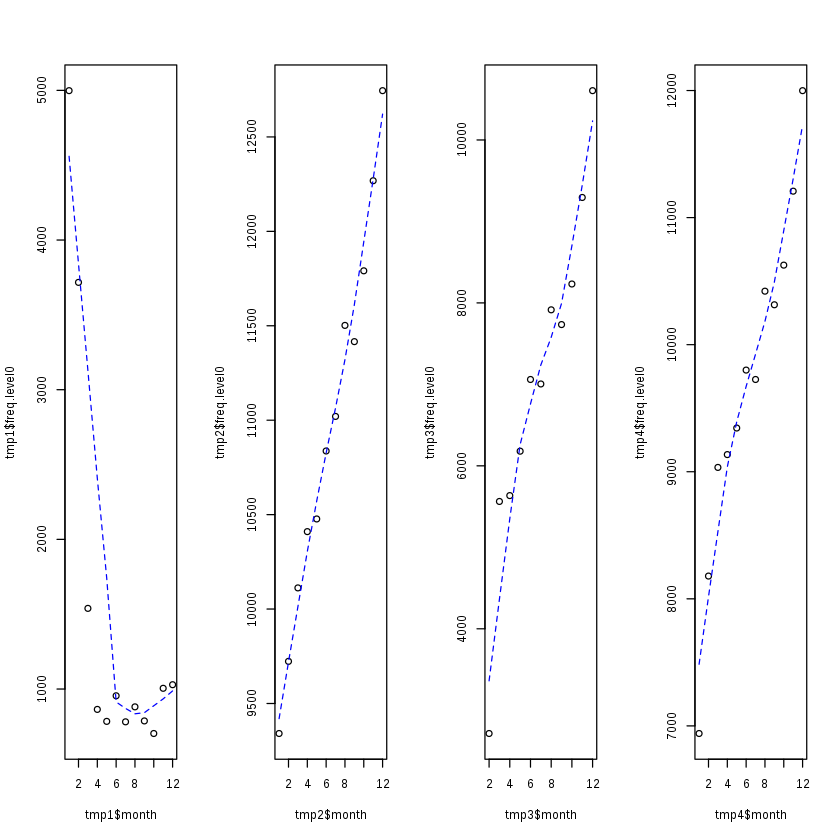

In [174]:
#freq.level0 : how many times this cluster purchased in that month
tmp1 <- level0[which(level0$cluster==1),]
tmp2 <- level0[which(level0$cluster==2),]
tmp3 <- level0[which(level0$cluster==3),]
tmp4 <- level0[which(level0$cluster==4),]

#customer_id with 4 segementation: cluster1, 2, 3, 4
#          recency  frequency  monetary
#cluster1:    0         0         0     (471852)
#cluster2:    3         9         9     (161684)
#cluster3:    8         2         2     (176119)
#cluster4:    6         6         6     (190345)

par( mfrow = c(1, 4))
plot(x=tmp1$month,y=tmp1$freq.level0)
lines(lowess(x=tmp1$month,y=tmp1$freq.level0), col="blue", lty = 2)
plot(x=tmp2$month,y=tmp2$freq.level0)
lines(lowess(x=tmp2$month,y=tmp2$freq.level0), col="blue", lty = 2)
plot(x=tmp3$month,y=tmp3$freq.level0)
lines(lowess(x=tmp3$month,y=tmp3$freq.level0), col="blue", lty = 2)
plot(x=tmp4$month,y=tmp4$freq.level0)
lines(lowess(x=tmp4$month,y=tmp4$freq.level0), col="blue", lty = 2)
#as we can see from the graphs below, cluster 2, 3, 4 tend to pusrchase more as the time goes by in a year

### Explore level1, 2, 3, 4, 5
we can see from the graphs below, customers in cluster 2, 3, 4 tend to pusrchase more as the time goes by in a year

In [213]:
price <- unique(revenue_factor[,c("price","brand_id","division","category","subcategory","fineline")])

In [266]:
#freq.level1: how frequently this cluster purchased a particular division in that month in 2009
division_freq <- merge(level0, level1, by = c('cluster','year','month'), all.y=TRUE)
division_freq$division_freq_percentage <- division_freq$freq.level1/division_freq$freq.level0
#add mean price of that division 
price_of_division = aggregate(price~division, price, mean )
division_freq <- merge(division_freq, price_of_division, by = c("division"), all.y=TRUE)
division_freq <- division_freq[order(division_freq$cluster, division_freq$month, -division_freq$division_freq_percentage),]
head(division_freq)


#freq.level2: how many times this cluster purchased a particular division & category in that month
temp <- division_freq
temp$price<-NULL
category_freq <- merge(temp, level2, by = c('cluster','year','month','division'), all.y=TRUE)
category_freq$category_freq_percentage <- category_freq$freq.level2/category_freq$freq.level1
#add mean price of that division & category 
price_of_category = aggregate(price~division+category, price, mean )
category_freq <- merge(category_freq, price_of_category, by = c("division","category"), all.y=TRUE)
category_freq <- category_freq[order(category_freq$cluster, category_freq$month, -category_freq$category_freq_percentage),]
head(category_freq)


#freq.level3: how many times this cluster purchased a particular division & category & subcategory in that month
temp <- category_freq
temp$price<-NULL
subcategory_freq <- merge(temp, level3, by = c('cluster','year','month','division','category'), all.y=TRUE)
subcategory_freq$subcategory_freq_percentage <- subcategory_freq$freq.level3/subcategory_freq$freq.level2
#add mean price of that division & category & subcategory 
price_of_subcategory <- aggregate(price~division+category+subcategory, price, mean )
subcategory_freq <- merge(subcategory_freq, price_of_subcategory, by = c("division","category","subcategory"), all.y=TRUE)
subcategory_freq <- subcategory_freq[order(subcategory_freq$cluster, subcategory_freq$month, -subcategory_freq$subcategory_freq_percentage),]
head(subcategory_freq)

,division,cluster,year,month,freq.level0,freq.level1,division_freq_percentage,price
478,16,1,2009,1,4998,1685,0.33713485,22.01296
424,15,1,2009,1,4998,1680,0.33613445,17.17364
173,7,1,2009,1,4998,737,0.14745898,35.53786
151,6,1,2009,1,4998,333,0.06662665,16.71414
528,17,1,2009,1,4998,176,0.03521409,10.18689
1,1,1,2009,1,4998,152,0.03041216,65.04477


,division,category,cluster,year,month,freq.level0,freq.level1,division_freq_percentage,freq.level2,category_freq_percentage,price
336,4,1,1,2009,1,4998,1,0.0002000800,1,1.0000000,4.75000
4905,23,2,1,2009,1,4998,13,0.0026010404,11,0.8461538,42.04167
3,1,1,1,2009,1,4998,152,0.0304121649,120,0.7894737,63.83088
1952,8,1,1,2009,1,4998,132,0.0264105642,92,0.6969697,14.48370
2534,13,1,1,2009,1,4998,63,0.0126050420,33,0.5238095,15.57778
190,2,3,1,2009,1,4998,4,0.0008003201,2,0.5000000,19.52083


,division,category,subcategory,cluster,year,month,freq.level0,freq.level1,division_freq_percentage,freq.level2,category_freq_percentage,freq.level3,subcategory_freq_percentage,price
314,1,2,13,1,2009,1,4998,152,0.0304121649,1,0.006578947,1,1,69.00000
580,2,3,33,1,2009,1,4998,4,0.0008003201,2,0.500000000,2,1,19.52083
593,2,6,27,1,2009,1,4998,4,0.0008003201,1,0.250000000,1,1,46.79167
668,2,10,30,1,2009,1,4998,4,0.0008003201,1,0.250000000,1,1,45.56731
744,4,1,1,1,2009,1,4998,1,0.0002000800,1,1.000000000,1,1,4.75000
1344,6,8,17,1,2009,1,4998,333,0.0666266507,7,0.021021021,7,1,21.82353


### Level1: division
#### how frequently this cluster purchased a particular division in a particular month in 2009

#### Let's see from the graph: 
when set division_freq_percentage cutoff as 0.03, divisions people buy more frequently are 16,15,7,6,1,17

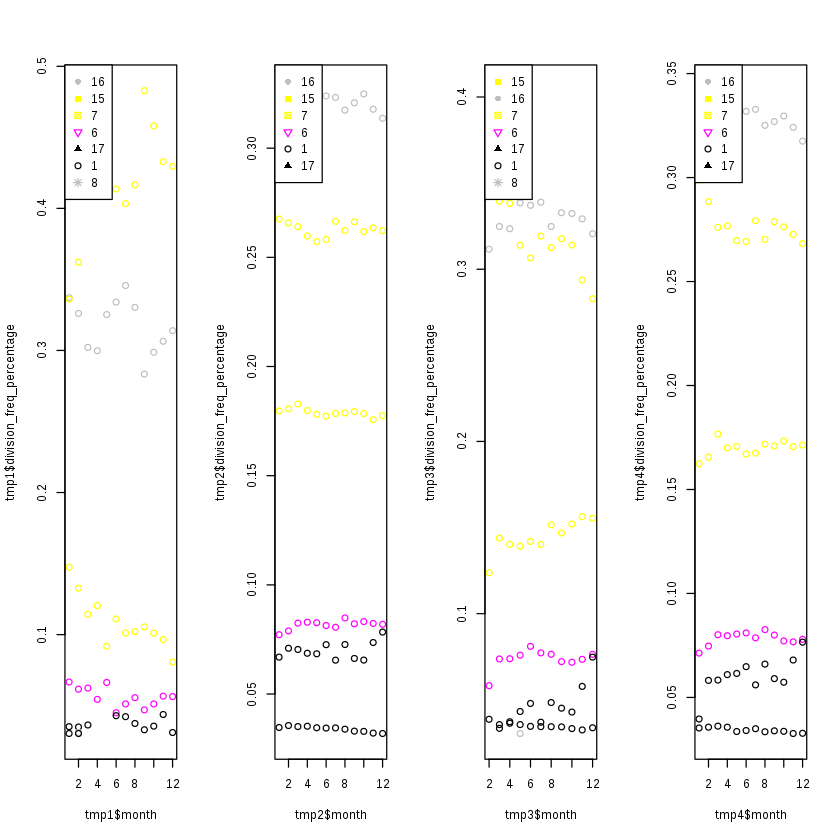

In [299]:
#freq.level1 graphs   
tmp1 <- division_freq[which(division_freq$cluster==1& division_freq$division_freq_percentage>0.03),]
tmp2 <- division_freq[which(division_freq$cluster==2& division_freq$division_freq_percentage>0.03),]
tmp3 <- division_freq[which(division_freq$cluster==3& division_freq$division_freq_percentage>0.03),]
tmp4 <- division_freq[which(division_freq$cluster==4& division_freq$division_freq_percentage>0.03),]
#& division_freq$division==6
#customer_id with 4 segementation: cluster1, 2, 3, 4
#          recency  frequency  monetary
#cluster1:    0         0         0     (471852)
#cluster2:    3         9         9     (161684)
#cluster3:    8         2         2     (176119)
#cluster4:    6         6         6     (190345)
par(mfrow = c(1, 4))
plot(x=tmp1$month,y=tmp1$division_freq_percentage,col=tmp1$division)
legend(x = 'topleft',pch=unique(tmp1$division),col=unique(tmp1$division),legend=paste(unique(tmp1$division)))
plot(x=tmp2$month,y=tmp2$division_freq_percentage,col=tmp2$division)
legend(x = 'topleft',pch=unique(tmp2$division),col=unique(tmp2$division),legend=paste(unique(tmp2$division)))
plot(x=tmp3$month,y=tmp3$division_freq_percentage,col=tmp3$division)
legend(x = 'topleft',pch=unique(tmp3$division),col=unique(tmp3$division),legend=paste(unique(tmp3$division)))
plot(x=tmp4$month,y=tmp4$division_freq_percentage,col=tmp4$division)
legend(x = 'topleft',pch=unique(tmp4$division),col=unique(tmp4$division),legend=paste(unique(tmp4$division)))
#as we can see from the graphs below, cluster 2, 3, 4 tend to pusrchase more as the time goes by in a year
#we can see 4 division are mostly bought

#### Predicting whether this customer will buy this division's product or not

In [313]:
#possibility of purchase = division_freq_percentage
isTraining = runif(nrow(division_freq)) < .8
#Split into training and validationData 
trainingData = subset(division_freq,isTraining) 
validationData = subset(division_freq,!isTraining)

model <- lm(division_freq_percentage ~ price + factor(cluster) + factor(month) + factor(division), data = trainingData)

#Check MSE: 0.000349472304047383 , not too high
mean((validationData$division_freq_percentage - predict(model,validationData))^2)

Warning message in predict.lm(model, validationData):
“prediction from a rank-deficient fit may be misleading”

[1] 0.0003494723

In [229]:
model <- lm(division_freq_percentage ~ price + factor(cluster) + factor(month) + factor(division), data = division_freq)
summary(model)

'''
price               8.779e-04  1.114e-04   7.882 1.34e-14 ***
factor(division)6   6.725e-02  5.565e-03  12.085  < 2e-16 ***
factor(division)15  3.151e-01  5.530e-03  56.990  < 2e-16 ***
factor(division)16  3.136e-01  5.177e-03  60.570  < 2e-16 ***

'''


Call:
lm(formula = division_freq_percentage ~ price + factor(cluster) + 
    factor(month) + factor(division), data = division_freq)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.070077 -0.000969 -0.000005  0.001425  0.161956 

Coefficients: (1 not defined because of singularities)
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -9.371e-03  7.288e-03  -1.286 0.198927    
price               8.779e-04  1.114e-04   7.882 1.34e-14 ***
factor(cluster)2   -1.738e-04  2.416e-03  -0.072 0.942656    
factor(cluster)3   -1.554e-04  2.510e-03  -0.062 0.950648    
factor(cluster)4   -1.683e-04  2.420e-03  -0.070 0.944599    
factor(month)2      3.389e-06  4.272e-03   0.001 0.999367    
factor(month)3      1.533e-05  4.297e-03   0.004 0.997155    
factor(month)4      2.612e-05  4.312e-03   0.006 0.995169    
factor(month)5      6.005e-05  4.395e-03   0.014 0.989101    
factor(month)6      6.894e-05  4.394e-03   0.016 0.987485    
factor(month)7

#### Checking the most popular division in each cluster by eyeballing

In [305]:
division_freq[which(division_freq$cluster==1),][c(1:6),]
division_freq[which(division_freq$cluster==2),][c(1:6),]
division_freq[which(division_freq$cluster==3),][c(1:6),]
division_freq[which(division_freq$cluster==4),][c(1:6),]

,division,cluster,year,month,freq.level0,freq.level1,division_freq_percentage,price
478,16,1,2009,1,4998,1685,0.33713485,22.01296
424,15,1,2009,1,4998,1680,0.33613445,17.17364
173,7,1,2009,1,4998,737,0.14745898,35.53786
151,6,1,2009,1,4998,333,0.06662665,16.71414
528,17,1,2009,1,4998,176,0.03521409,10.18689
1,1,1,2009,1,4998,152,0.03041216,65.04477


,division,cluster,year,month,freq.level0,freq.level1,division_freq_percentage,price
480,16,2,2009,1,9341,3021,0.32341291,22.01296
443,15,2,2009,1,9341,2499,0.26753024,17.17364
196,7,2,2009,1,9341,1678,0.17963815,35.53786
141,6,2,2009,1,9341,721,0.07718660,16.71414
38,1,2,2009,1,9341,625,0.06690932,65.04477
523,17,2,2009,1,9341,324,0.03468579,10.18689


,division,cluster,year,month,freq.level0,freq.level1,division_freq_percentage,price
418,15,3,2009,2,2715,1096,0.40368324,17.17364
460,16,3,2009,2,2715,846,0.31160221,22.01296
190,7,3,2009,2,2715,336,0.12375691,35.53786
143,6,3,2009,2,2715,158,0.05819521,16.71414
504,17,3,2009,2,2715,105,0.03867403,10.18689
236,8,3,2009,2,2715,64,0.02357274,17.45221


,division,cluster,year,month,freq.level0,freq.level1,division_freq_percentage,price
456,16,4,2009,1,6940,2372,0.34178674,22.01296
408,15,4,2009,1,6940,2074,0.29884726,17.17364
168,7,4,2009,1,6940,1127,0.16239193,35.53786
132,6,4,2009,1,6940,495,0.07132565,16.71414
17,1,4,2009,1,6940,275,0.03962536,65.04477
506,17,4,2009,1,6940,245,0.03530259,10.18689


### how about the quantity in that division they bought? 

#### Let's see from the graph: 
when set division_freq_percentage cutoff as 0.04, the division which people buy largest quantity are: 16,15,7,6,1,17

Conclusion: the same as before: the division people buy more frequently, the more they will buy.

In [331]:
month_purchase_quantity = aggregate(product_quantity~cluster+year+month+division, revenue_factor ,sum )
month_purchase_quantity <- merge(division_freq, month_purchase_quantity, by = c('cluster','year','month','division'), all.x = TRUE)

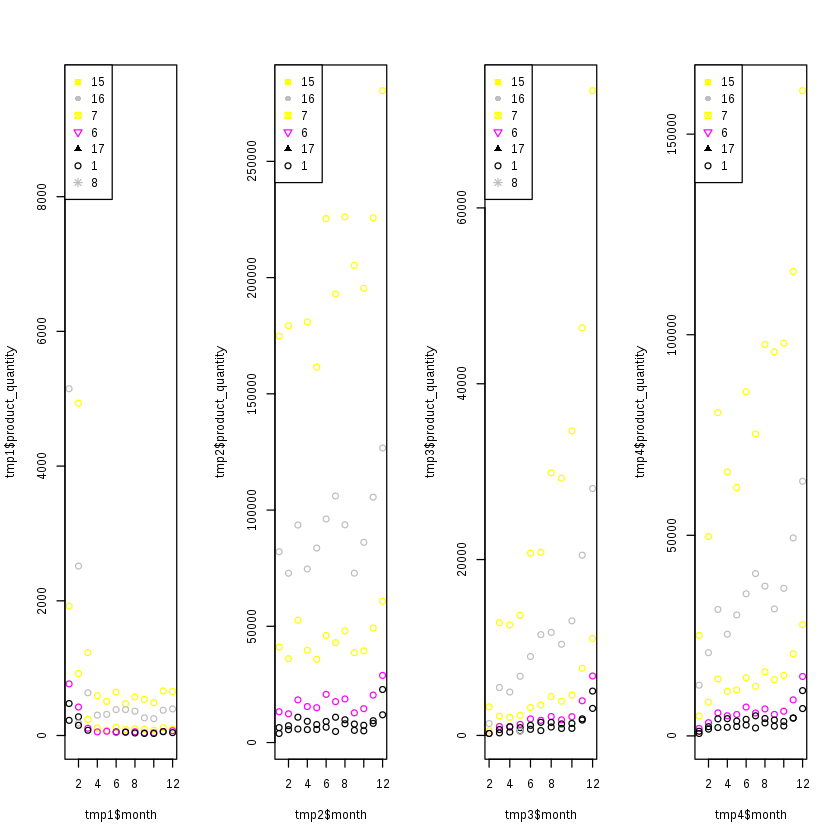

In [338]:
tmp1 <- month_purchase_quantity[which(month_purchase_quantity$cluster==1& month_purchase_quantity$division_freq_percentage>0.03),]
tmp2 <- month_purchase_quantity[which(month_purchase_quantity$cluster==2& month_purchase_quantity$division_freq_percentage>0.03),]
tmp3 <- month_purchase_quantity[which(month_purchase_quantity$cluster==3& month_purchase_quantity$division_freq_percentage>0.03),]
tmp4 <- month_purchase_quantity[which(month_purchase_quantity$cluster==4& month_purchase_quantity$division_freq_percentage>0.03),]

par(mfrow = c(1, 4))
plot(x=tmp1$month,y=tmp1$product_quantity,col=tmp1$division)
legend(x = 'topleft',pch=unique(tmp1$division),col=unique(tmp1$division),legend=paste(unique(tmp1$division)))
plot(x=tmp2$month,y=tmp2$product_quantity,col=tmp2$division)
legend(x = 'topleft',pch=unique(tmp2$division),col=unique(tmp2$division),legend=paste(unique(tmp2$division)))
plot(x=tmp3$month,y=tmp3$product_quantity,col=tmp3$division)
legend(x = 'topleft',pch=unique(tmp3$division),col=unique(tmp3$division),legend=paste(unique(tmp3$division)))
plot(x=tmp4$month,y=tmp4$product_quantity,col=tmp4$division)
legend(x = 'topleft',pch=unique(tmp4$division),col=unique(tmp4$division),legend=paste(unique(tmp4$division)))

#### Checking the divisions which people buy with the highest quantities in each cluster by eyeballing

In [336]:
month_purchase_quantity<-month_purchase_quantity[order(month_purchase_quantity$cluster, month_purchase_quantity$month, -month_purchase_quantity$product_quantity),]
month_purchase_quantity[which(month_purchase_quantity$cluster==1),][c(1:5),]
month_purchase_quantity[which(month_purchase_quantity$cluster==2),][c(1:5),]
month_purchase_quantity[which(month_purchase_quantity$cluster==3),][c(1:5),]
month_purchase_quantity[which(month_purchase_quantity$cluster==4),][c(1:5),]

,cluster,year,month,division,freq.level0,freq.level1,division_freq_percentage,price,product_quantity
10,1,2009,1,15,4998,1680,0.33613445,17.17364,9574
11,1,2009,1,16,4998,1685,0.33713485,22.01296,5149
5,1,2009,1,7,4998,737,0.14745898,35.53786,1922
4,1,2009,1,6,4998,333,0.06662665,16.71414,767
12,1,2009,1,17,4998,176,0.03521409,10.18689,475


,cluster,year,month,division,freq.level0,freq.level1,division_freq_percentage,price,product_quantity
144,2,2009,1,15,9341,2499,0.26753024,17.17364,174837
145,2,2009,1,16,9341,3021,0.32341291,22.01296,82063
139,2,2009,1,7,9341,1678,0.17963815,35.53786,41043
138,2,2009,1,6,9341,721,0.07718660,16.71414,13246
146,2,2009,1,17,9341,324,0.03468579,10.18689,6420


,cluster,year,month,division,freq.level0,freq.level1,division_freq_percentage,price,product_quantity
345,3,2009,2,15,2715,1096,0.40368324,17.17364,3251
346,3,2009,2,16,2715,846,0.31160221,22.01296,1352
340,3,2009,2,7,2715,336,0.12375691,35.53786,537
339,3,2009,2,6,2715,158,0.05819521,16.71414,222
347,3,2009,2,17,2715,105,0.03867403,10.18689,217


,cluster,year,month,division,freq.level0,freq.level1,division_freq_percentage,price,product_quantity
510,4,2009,1,15,6940,2074,0.29884726,17.17364,25064
511,4,2009,1,16,6940,2372,0.34178674,22.01296,12644
505,4,2009,1,7,6940,1127,0.16239193,35.53786,4973
504,4,2009,1,6,6940,495,0.07132565,16.71414,1861
512,4,2009,1,17,6940,245,0.03530259,10.18689,1162


### Level2: division & category
#### how many times this cluster purchased a particular division & category in a particular month in 2009
#### similar as division

#### Let's see from the graph: 
when set category_freq_percentage cutoff as 0.3, categories people buy more often are 16,15,7,6,1,17

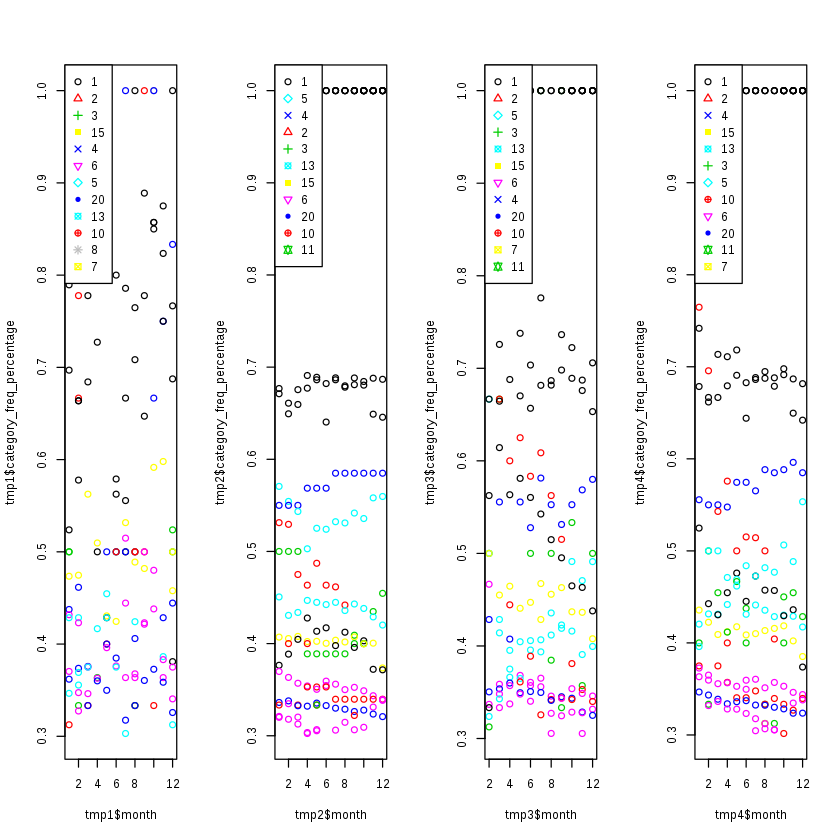

In [348]:
#freq.leve2 graphs   
tmp1 <- category_freq[which(category_freq$cluster==1 &category_freq$category_freq_percentage>0.3),]
tmp2 <- category_freq[which(category_freq$cluster==2 &category_freq$category_freq_percentage>0.3),]
tmp3 <- category_freq[which(category_freq$cluster==3 &category_freq$category_freq_percentage>0.3),]
tmp4 <- category_freq[which(category_freq$cluster==4 &category_freq$category_freq_percentage>0.3),]

par(mfrow = c(1, 4))
plot(x=tmp1$month,y=tmp1$category_freq_percentage,col=tmp1$category)
legend(x = 'topleft',pch=unique(tmp1$category),col=unique(tmp1$category),legend=paste(unique(tmp1$category)))
plot(x=tmp2$month,y=tmp2$category_freq_percentage,col=tmp2$category)
legend(x = 'topleft',pch=unique(tmp2$category),col=unique(tmp2$category),legend=paste(unique(tmp2$category)))
plot(x=tmp3$month,y=tmp3$category_freq_percentage,col=tmp3$category)
legend(x = 'topleft',pch=unique(tmp3$category),col=unique(tmp3$category),legend=paste(unique(tmp3$category)))
plot(x=tmp4$month,y=tmp4$category_freq_percentage,col=tmp4$category)
legend(x = 'topleft',pch=unique(tmp4$category),col=unique(tmp4$category),legend=paste(unique(tmp4$category)))

### The rest levels: similar as division and category
